# Load libraries

In [321]:
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data Exploration

In [322]:
%%capture
!pip install kaggle

In [323]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (7).json


In [324]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [325]:
%%capture
!kaggle datasets list

In [326]:
!kaggle datasets download -d goyalshalini93/car-data

car-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [327]:
import zipfile

# Specify the path to the ZIP file
zip_path = "/content/car-data.zip"

# Specify the name of the CSV file within the ZIP archive
csv_filename = 'CarPrice_Assignment.csv'

# Open the ZIP file and read the specified CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_file:
    # Assuming the CSV file is in the root of the ZIP archive
    with zip_file.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file)

# Display the first few rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [328]:
#check the first 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [329]:
#check the last 5 rows
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [330]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 205 entries, 0 to 204

Data columns (total 26 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   car_ID            205 non-null    int64  

 1   symboling         205 non-null    int64  

 2   CarName           205 non-null    object 

 3   fueltype          205 non-null    object 

 4   aspiration        205 non-null    object 

 5   doornumber        205 non-null    object 

 6   carbody           205 non-null    object 

 7   drivewheel        205 non-null    object 

 8   enginelocation    205 non-null    object 

 9   wheelbase         205 non-null    float64

 10  carlength         205 non-null    float64

 11  carwidth          205 non-null    float64

 12  carheight         205 non-null    float64

 13  curbweight        205 non-null    int64  

 14  enginetype        205 non-null    object 

 15  cylindernumber    205 non-null    object 

 16  enginesize        205 n

In [331]:
# check the data type of each column
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [332]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [333]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# Data Cleaning

In [334]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [335]:
# Check for duplicates
df.duplicated().sum()

0

In [336]:
df.drop(["car_ID"], axis= 1, inplace= True)

# Data visualization

# Target visualization

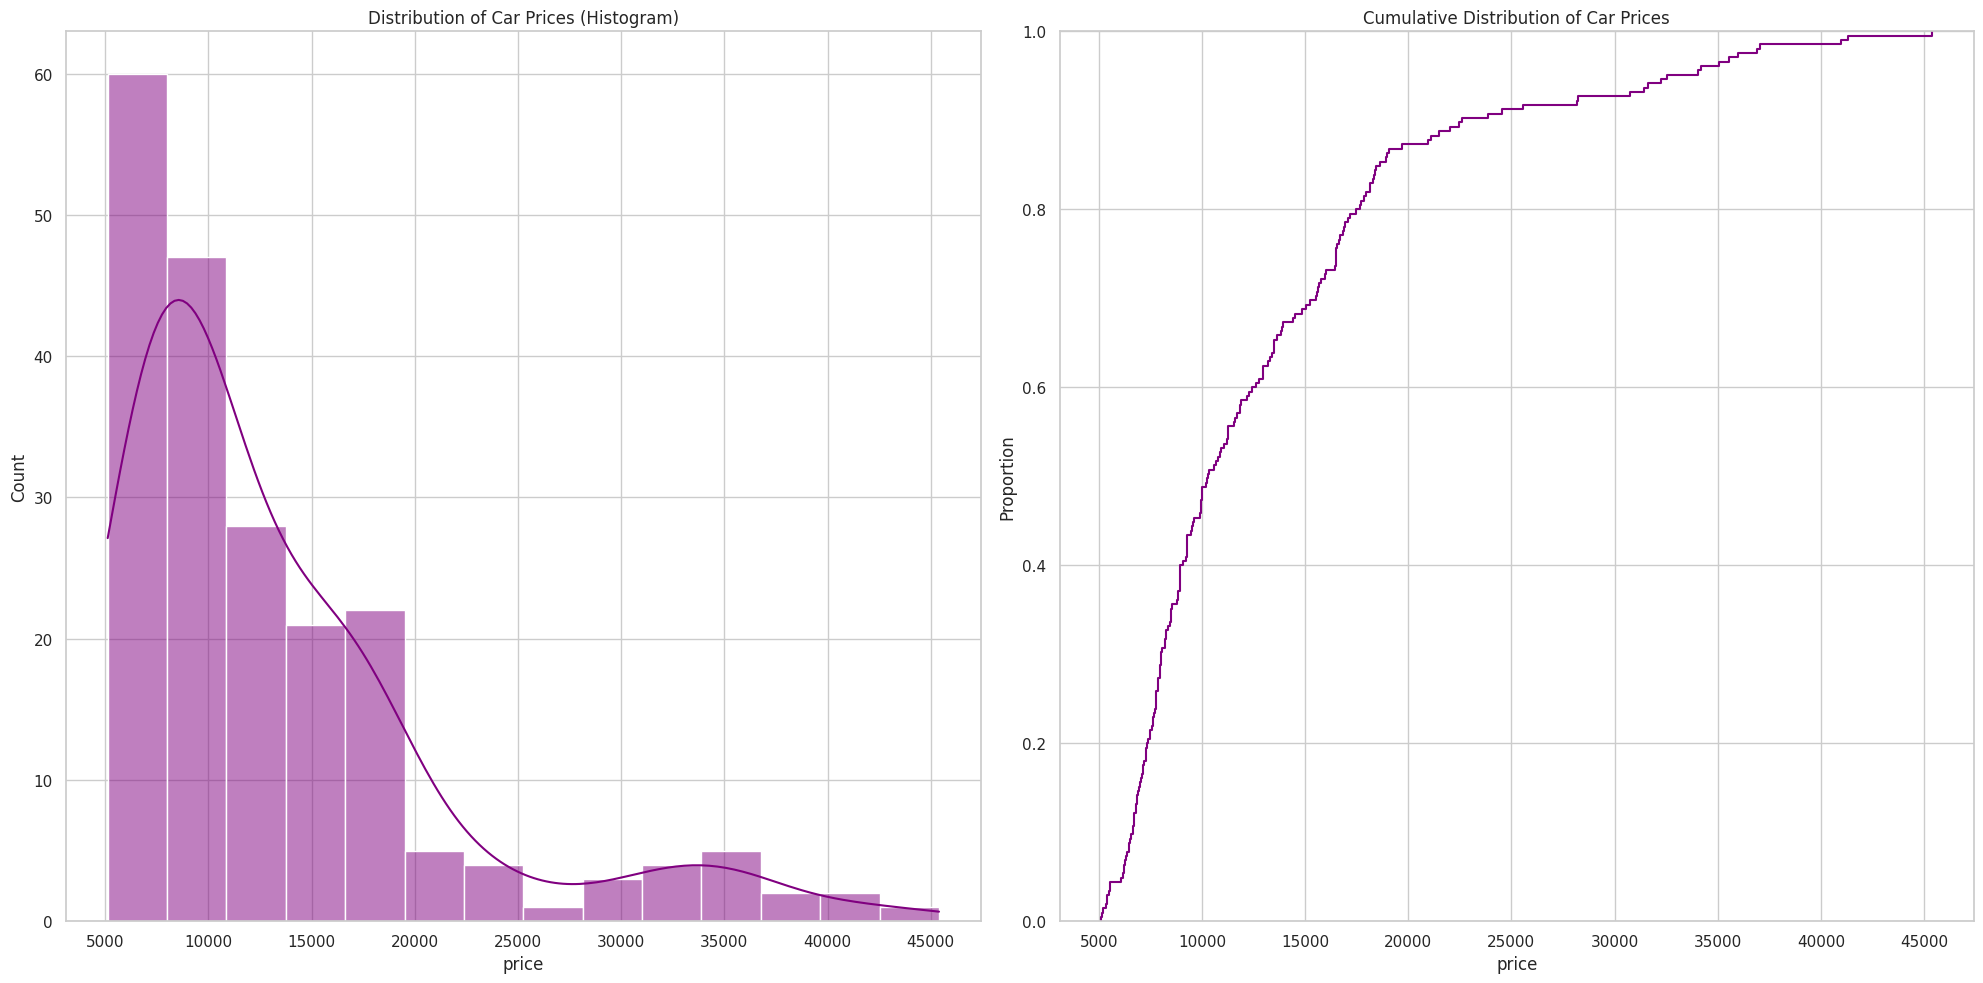

In [337]:
# Create a figure and a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the histogram on the first subplot
sns.histplot(x=df['price'], kde=True, color='purple', ax=ax1)
ax1.set_title('Distribution of Car Prices (Histogram)')

# Plot the ECDF on the second subplot
sns.ecdfplot(data=df['price'], color='purple', ax=ax2)
ax2.set_title('Cumulative Distribution of Car Prices')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


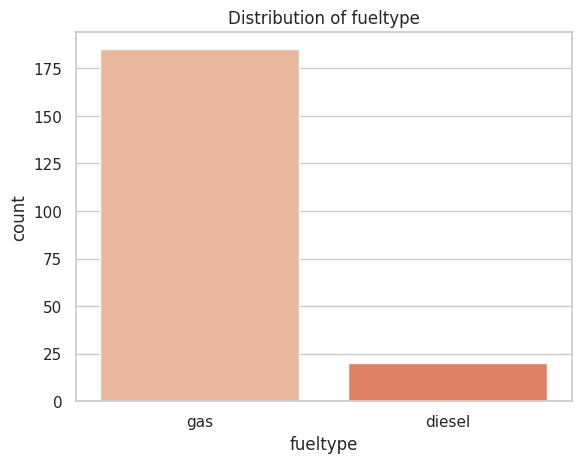

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: 

The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


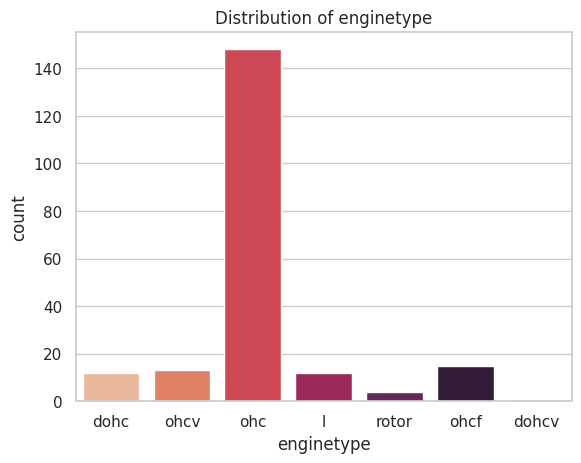

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


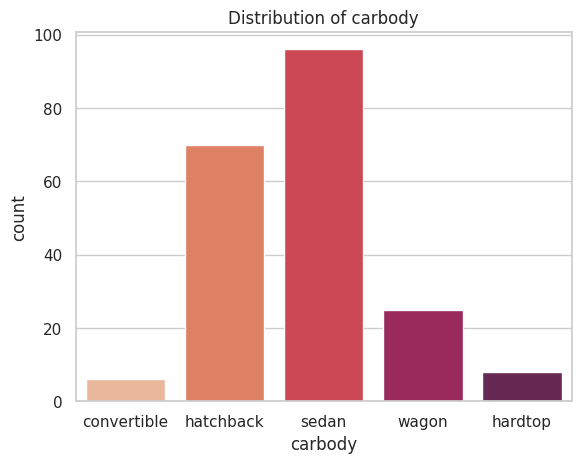

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


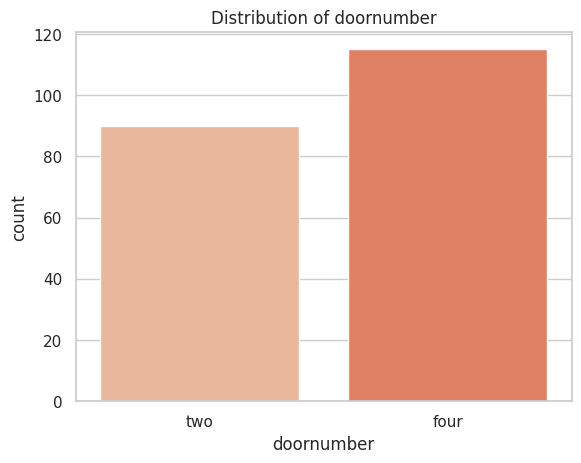

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


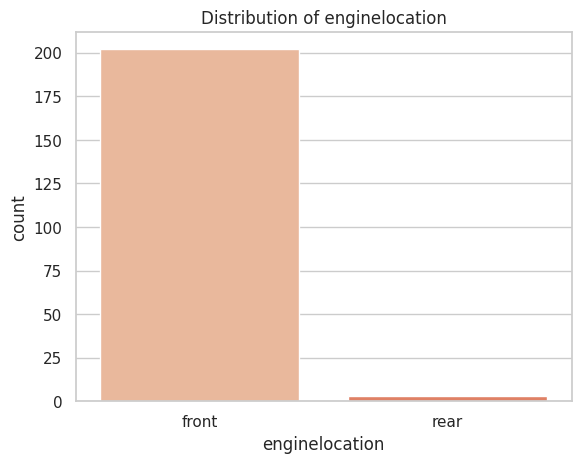

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: 

The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


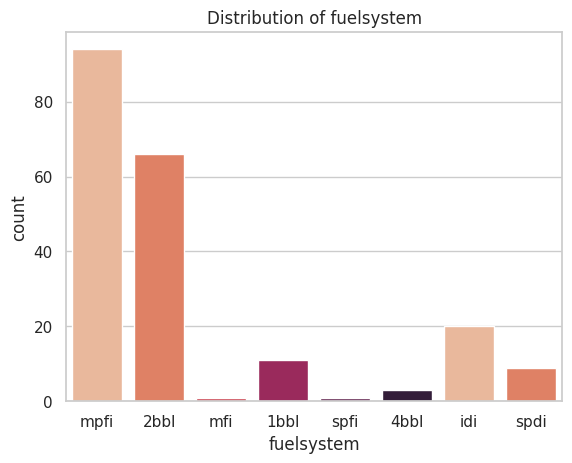

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: 

The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


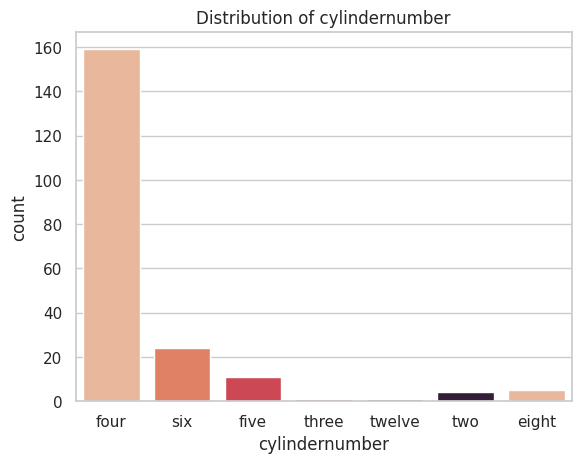

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


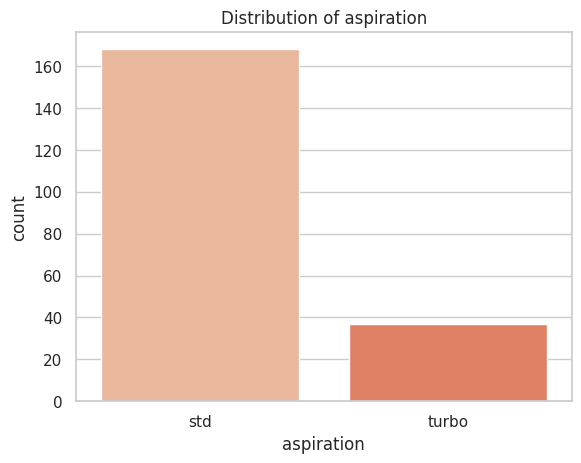

<ipython-input-338-7d4ff6cf921a>:9: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.

  sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning


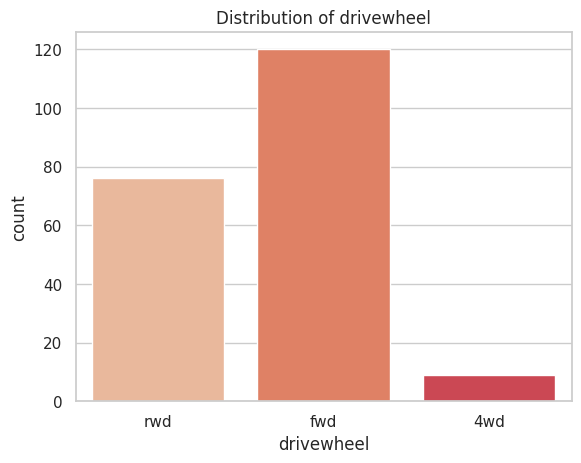

In [338]:
# Create the "rocket" color palette (without as_cmap=True)
palette = sns.color_palette("rocket_r")

columns_to_plot = ['fueltype', 'enginetype', 'carbody', 'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber', 'aspiration', 'drivewheel']

# Generate and display countplots with the "rocket" palette
for col in columns_to_plot:
    plt.figure()  # Create a new figure for each plot
    sns.countplot(x=col, data=df, hue=col, palette=palette, legend=False)  # Apply palette and address warning
    plt.title(f"Distribution of {col}")
    plt.show()

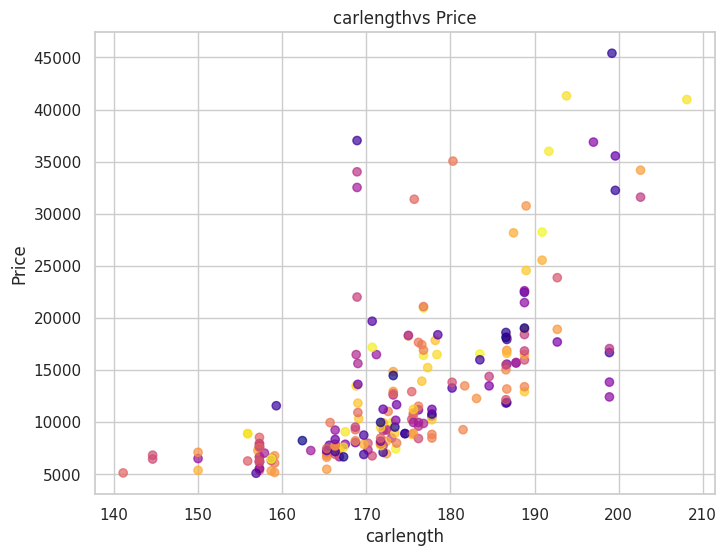

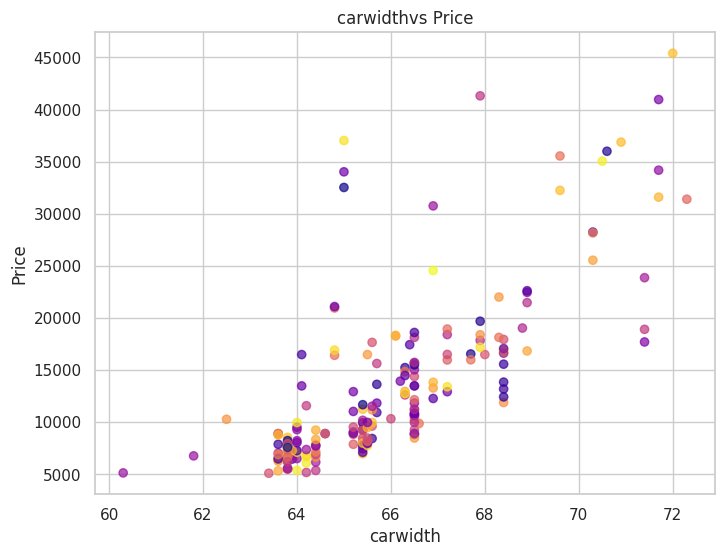

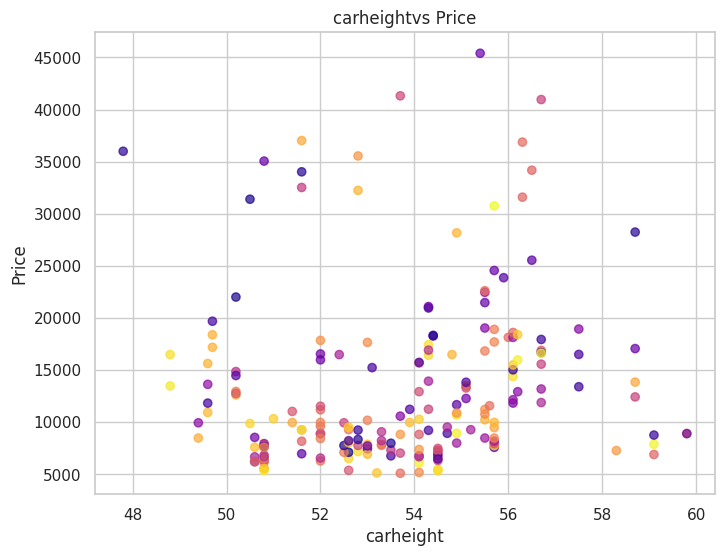

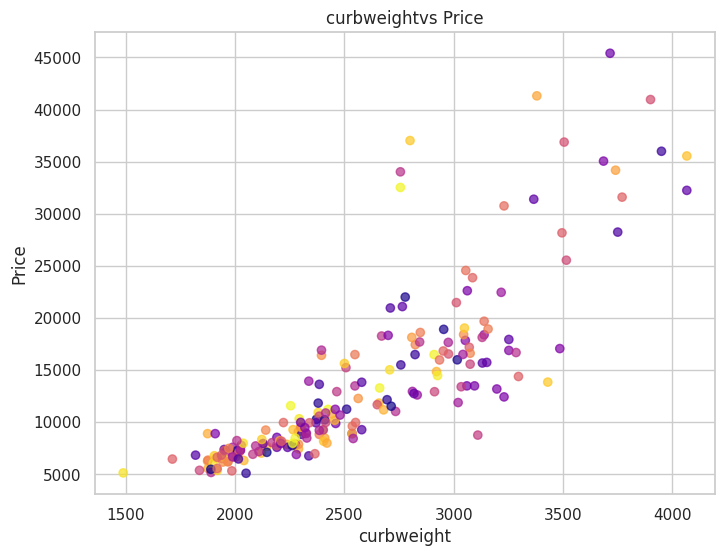

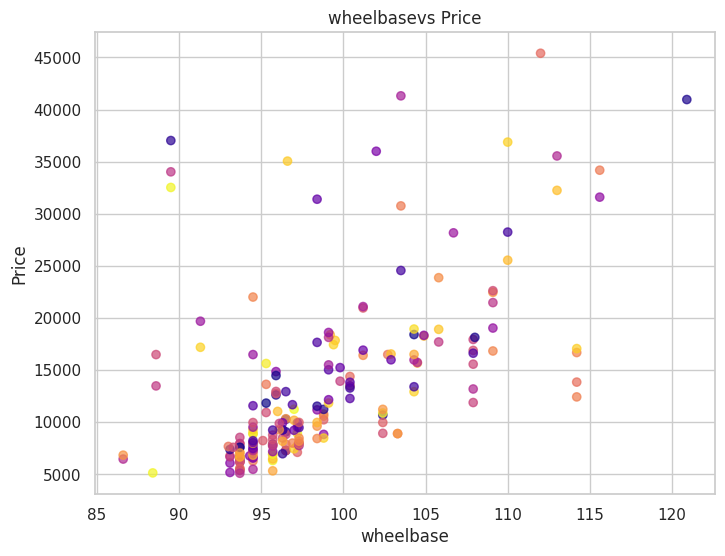

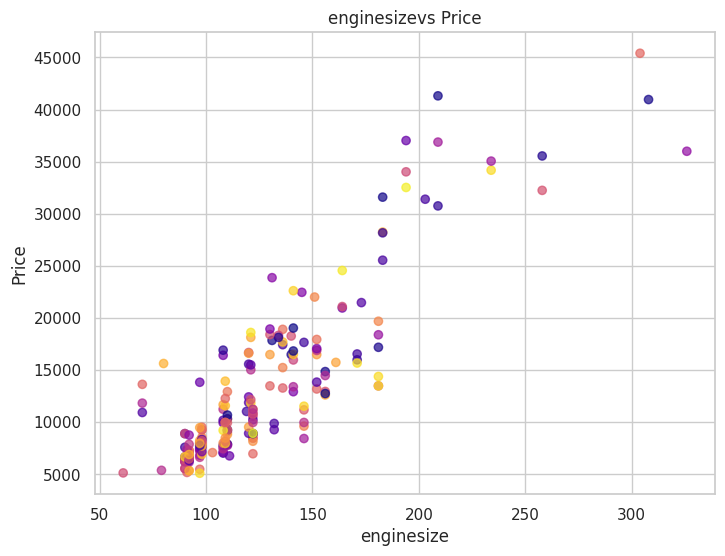

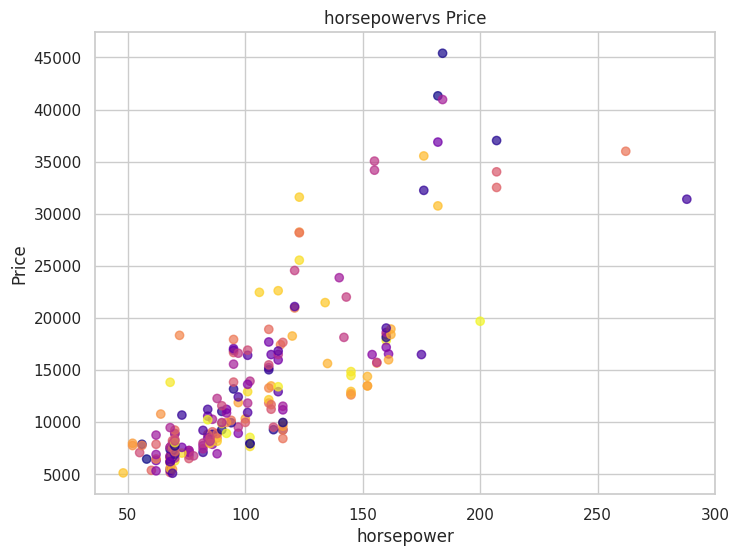

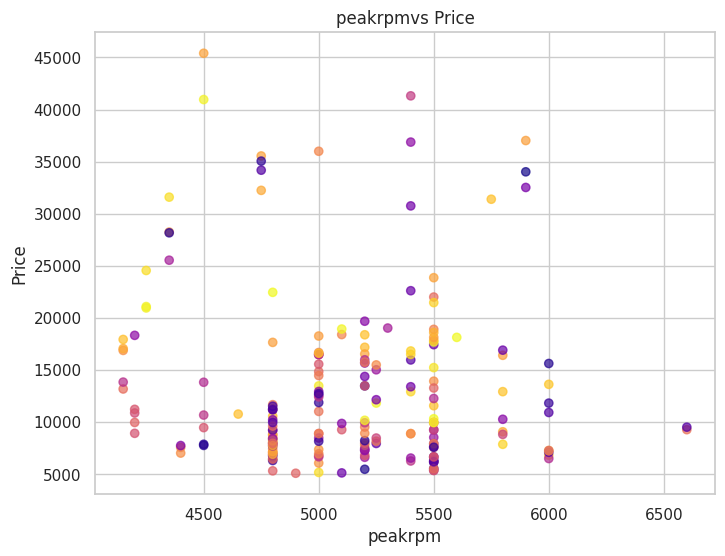

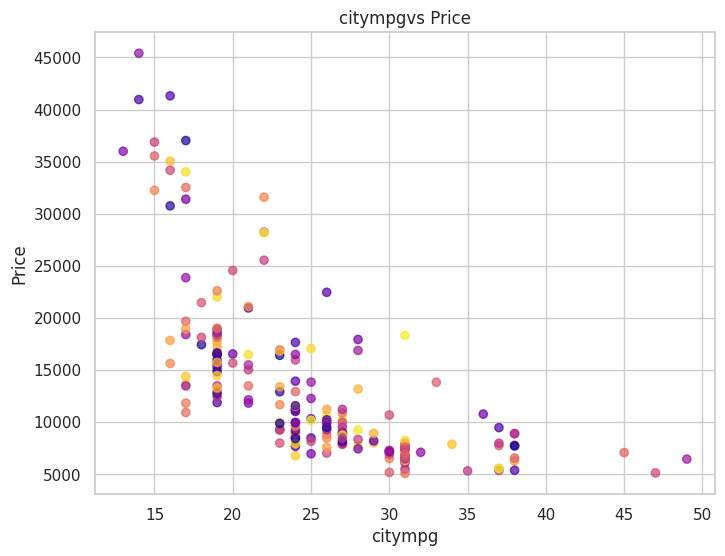

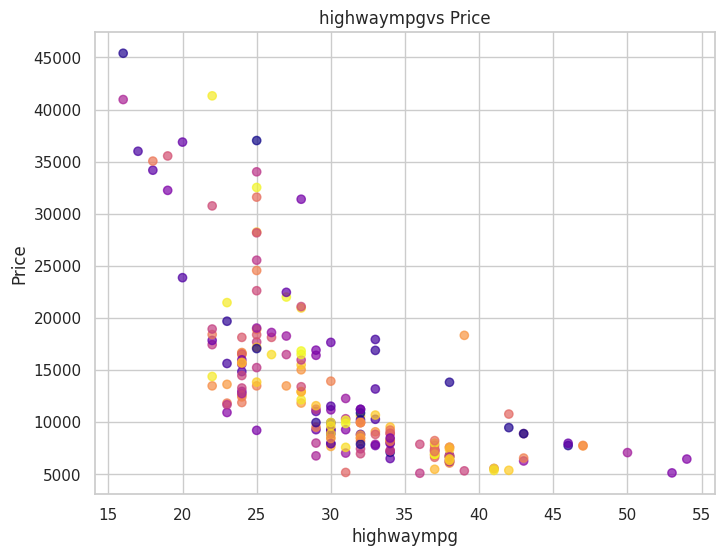

In [339]:
features = ["carlength", "carwidth", "carheight", "curbweight", "wheelbase", "enginesize","horsepower","peakrpm","citympg","highwaympg"]

for feature in features:
    plt.figure(figsize=(8, 6))

    colors = np.random.rand(df.shape[0])
    plt.scatter(df[feature], df["price"], c=colors, alpha=0.7, cmap="plasma")
    plt.title(feature +  "vs Price")
    plt.ylabel("Price")
    plt.xlabel(feature)

    plt.show()

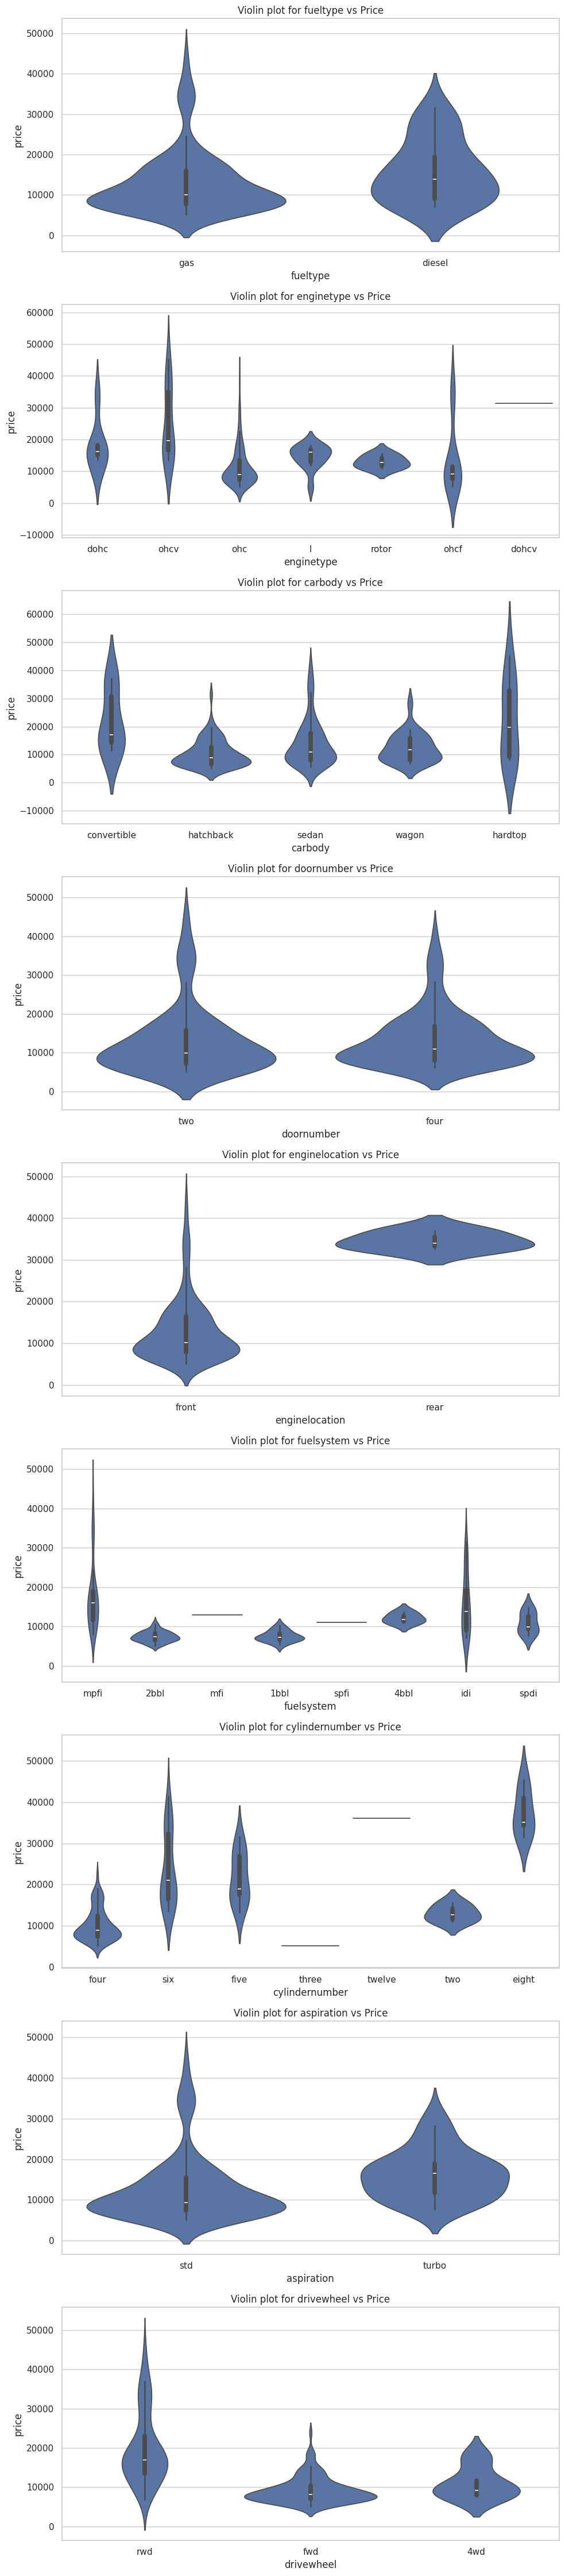

In [340]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the categorical variables to visualize
categorical_variables = [ 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

# Plot violin plots for each categorical variable against price
for i, variable in enumerate(categorical_variables):
    sns.violinplot(x=variable, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Violin plot for {variable} vs Price')


# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-341-de5c1b34730f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  sns.heatmap(df[c_list[1:]].corr(), annot=True, fmt=".2f")


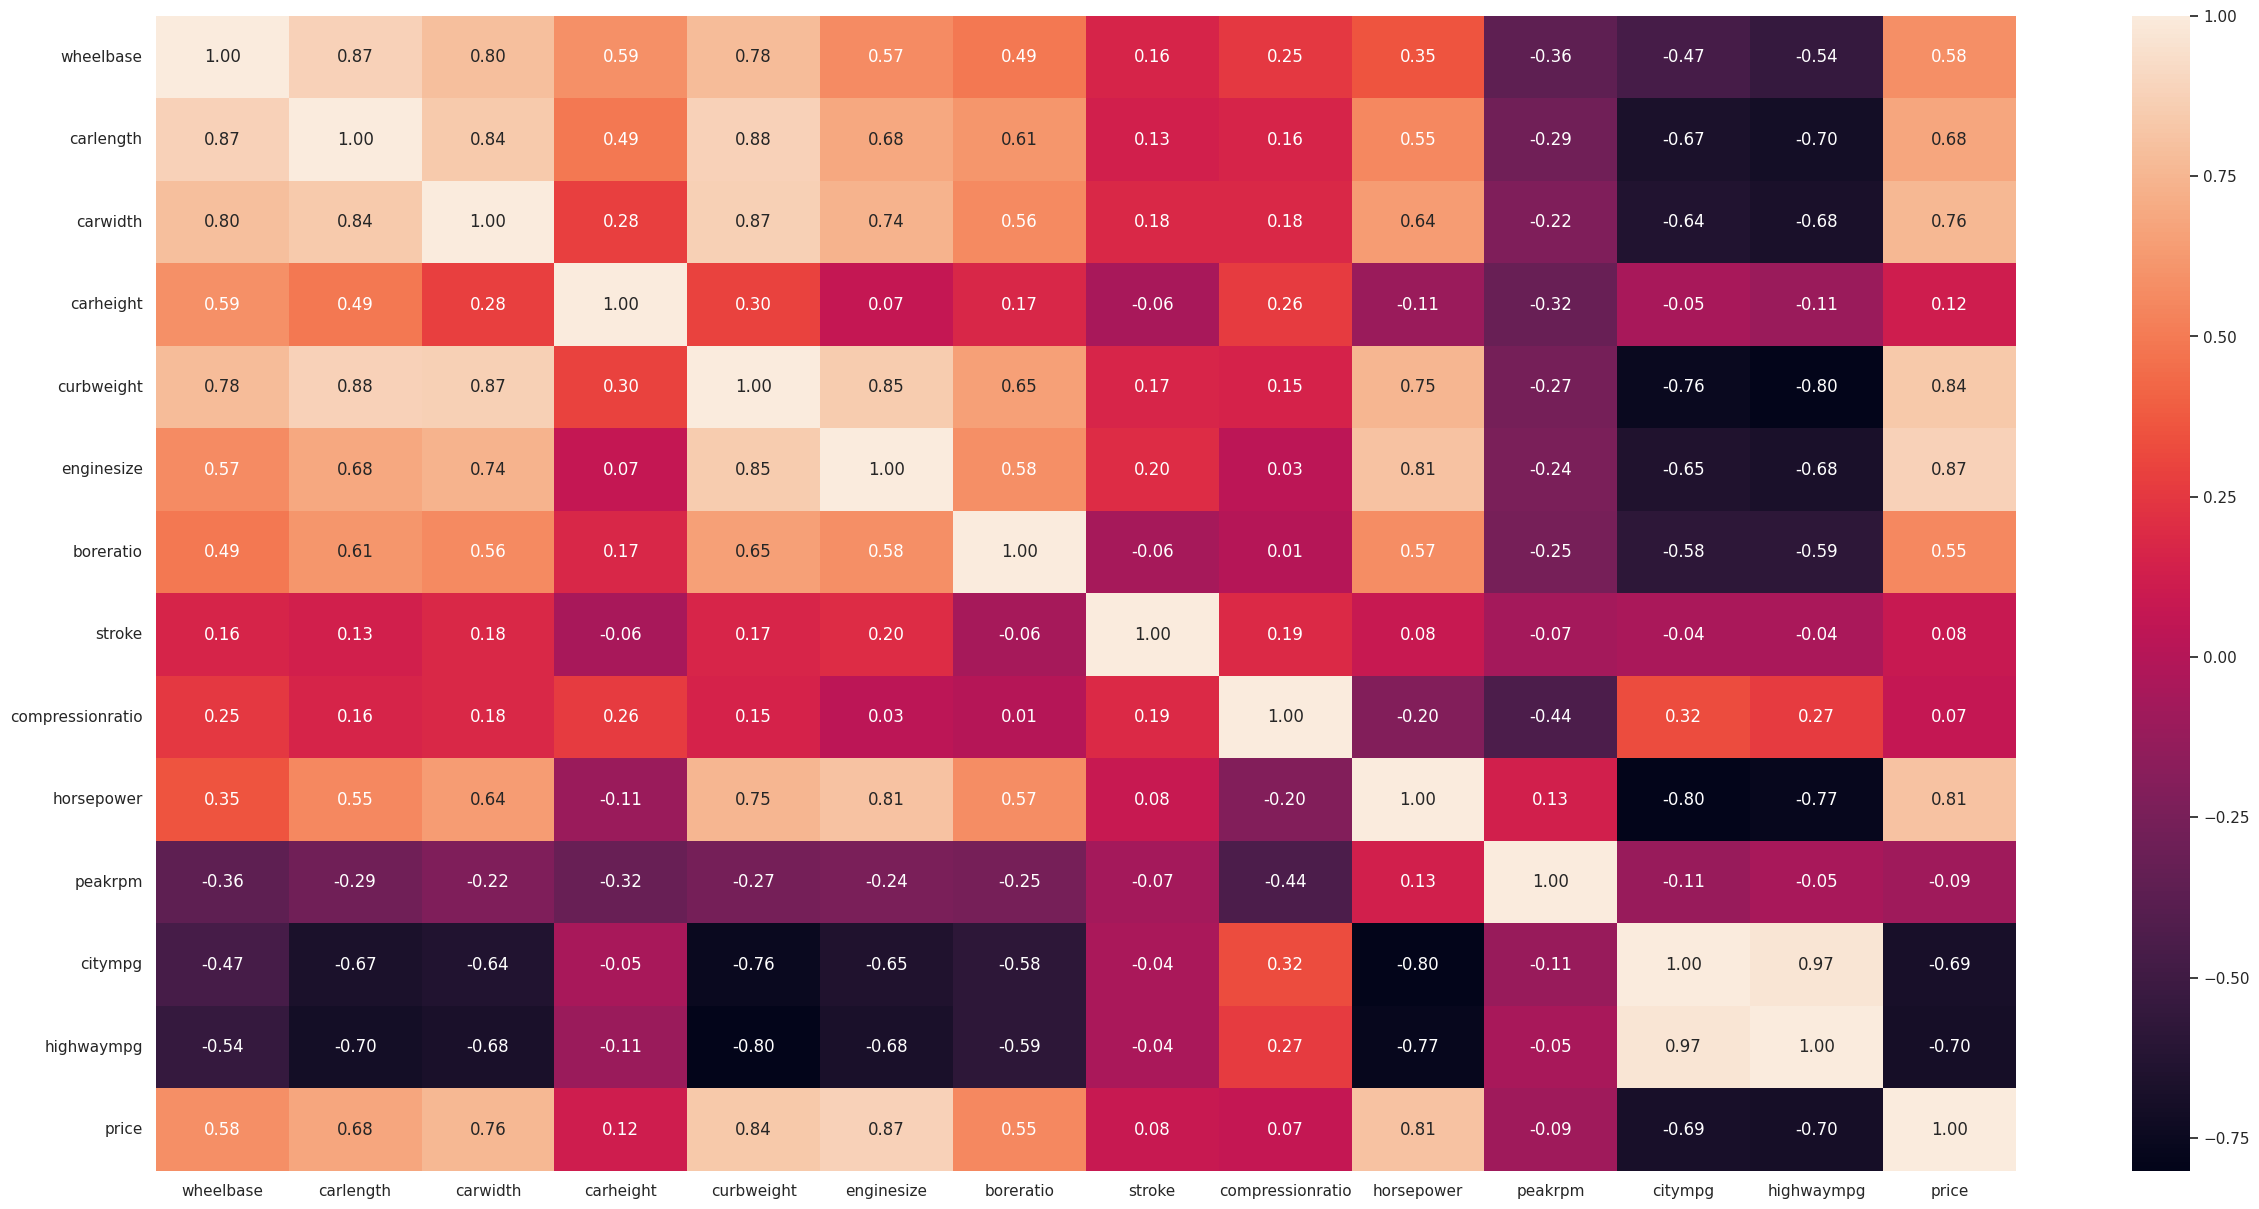

In [341]:
c_list = df.columns
plt.figure(figsize=(30, 15))
sns.heatmap(df[c_list[1:]].corr(), annot=True, fmt=".2f")
plt.show()

In [342]:
encoder_columns = ["CarName","doornumber","enginelocation",'enginetype',"fuelsystem", 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in encoder_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the encoded DataFrame
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [343]:
# Features (X) and Target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled features
X_train_scaled[:5]  # Displaying the first 5 rows for reference

array([[-0.72738032, -0.42008686, -3.15171911, -0.46348119, -0.91798509,
         0.45721393,  1.19131812, -0.13650473,  1.03708546,  0.07244984,
         0.08381686,  0.27677891,  0.28128677,  0.04963143, -0.16709347,
         0.18801047, -0.13609459,  0.4058361 ,  1.21510088,  3.09986047,
        -0.81538553, -1.91782869,  0.96431609,  1.3135007 ],
       [-0.72738032,  0.19350635,  0.31728716, -0.46348119, -0.91798509,
         0.45721393,  1.19131812, -0.13650473,  1.54123134,  1.04391556,
         1.17026768,  1.20726917,  1.01604452, -0.85476353, -0.16709347,
        -0.15899277,  0.85588374,  0.51738434, -3.36016616, -0.43959084,
        -0.24189416, -0.292907  , -0.98812636, -1.02456857],
       [-0.72738032,  1.07708056,  0.31728716, -0.46348119, -0.91798509,
         1.61079985, -0.63462741, -0.13650473, -0.50896191, -0.36761583,
        -1.09710795,  2.17821552, -0.54164191,  0.04963143, -0.16709347,
        -0.85299925, -1.12807291, -1.00710835, -0.70966663, -0.28343858,
  

In [345]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [346]:
# Generate predictions on scaled test data
y_pred = model.predict(X_test_scaled)

In [347]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results using f-strings for readability
print(f"Mean Squared Error (MSE): {mse:.4f}")  # Format MSE to 4 decimal places
print(f"R-squared (R2): {r2:.4f}")  # Format R2 to 4 decimal places

Mean Squared Error (MSE): 12575220.8276

R-squared (R2): 0.8407


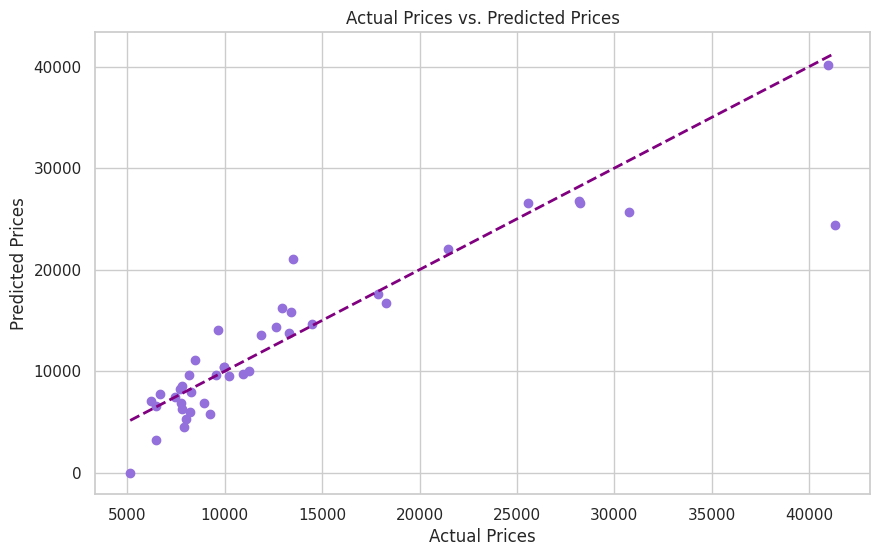

In [348]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='mediumpurple')  # Use 'mediumpurple' (valid color name)

x_min, x_max = min(y_test), max(y_test)
y_min, y_max = min(y_test), max(y_test)

plt.plot([x_min, x_max], [y_min, y_max], linestyle='--', color='purple', linewidth=2)  # Diagonal line

plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()